In [1]:
import os, xarray as xr, numpy as np, pandas as pd, datetime, dask, random, time, netCDF4
import cartopy.crs as ccrs, matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import cartopy.crs as ccrs, time
import matplotlib.animation as animation
from datetime import datetime as dt, timedelta
import matplotlib.patches as mpatches
dask.config.set({"array.slicing.split_large_chunks": True})

In [2]:
sa_lon = [60, 98]
sa_lat = [6, 40]

nibox_lon = [68, 78]
nibox_lat = [24, 31]

In [5]:
dir_2D = '/home/data/lab_hardik/data/ERA5/daily_means/2D/'

os.chdir(dir_2D)
# os.listdir()

## Read in sshf anomalies as computed below, and add climatology to retrieve daily mean field

In [12]:
sshf_anom_files = [s for s in os.listdir(dir_2D) if 'sensible' in s and 'anom' in s]
sshf_anom_files.sort(key = lambda s: int(s.split('_')[-1].split('.')[0]))

In [14]:
sshf_anom_files[:3]

['SA_dly_anoms_prmnsn_surface_sensible_heat_flux_1980.nc',
 'SA_dly_anoms_prmnsn_surface_sensible_heat_flux_1981.nc',
 'SA_dly_anoms_prmnsn_surface_sensible_heat_flux_1982.nc']

In [19]:
xr.open_dataset(dir_2D + sshf_anom_files[0])

<xarray.Dataset>
Dimensions:        (latitude: 137, longitude: 153, date: 121)
Coordinates:
  * latitude       (latitude) float64 40.0 39.75 39.5 39.25 ... 6.5 6.25 6.0
  * longitude      (longitude) float64 60.0 60.25 60.5 60.75 ... 97.5 97.75 98.0
  * date           (date) datetime64[ns] 1980-03-01 1980-03-02 ... 1980-06-29
    strftime       (date) object ...
Data variables:
    sshf_10D_anom  (latitude, longitude, date) float32 ...

In [16]:
dir_clmt_2d = '/home/data/lab_hardik/data/ERA5/climatology/2D/'
clmt_files = [s for s in os.listdir(dir_clmt_2d) if ('.nc' in s) and s.startswith('SA')]
#              and '2m_temp' not in s]
clmt_files.sort()
print(len(clmt_files))
clmt_files

10


['SA_rolling_clmtlgy_10m_v_component_of_wind_1980_2022.nc',
 'SA_rolling_clmtlgy_2m_temperature_1980_2022.nc',
 'SA_rolling_clmtlgy_boundary_layer_height_1980_2022.nc',
 'SA_rolling_clmtlgy_prmnsn_mean_surface_downward_long_wave_radiation_flux_1980_2022.nc',
 'SA_rolling_clmtlgy_prmnsn_mean_surface_downward_short_wave_radiation_flux_1980_2022.nc',
 'SA_rolling_clmtlgy_prmnsn_mean_surface_net_long_wave_radiation_flux_1980_2022.nc',
 'SA_rolling_clmtlgy_prmnsn_mean_surface_net_short_wave_radiation_flux_1980_2022.nc',
 'SA_rolling_clmtlgy_prmnsn_surface_pressure_1980_2022.nc',
 'SA_rolling_clmtlgy_surface_latent_heat_flux_1980_2022.nc',
 'SA_rolling_clmtlgy_surface_sensible_heat_flux_1980_2022.nc']

In [18]:
ds_sshf_clmt = xr.open_dataset(dir_clmt_2d + 'SA_rolling_clmtlgy_surface_sensible_heat_flux_1980_2022.nc')

In [22]:
ds_sshf_clmt

<xarray.Dataset>
Dimensions:                 (latitude: 137, longitude: 153, strftime: 122,
                             strftime_2: 122, clmt_roll_strftime: 122)
Coordinates:
  * latitude                (latitude) float64 40.0 39.75 39.5 ... 6.5 6.25 6.0
  * longitude               (longitude) float64 60.0 60.25 60.5 ... 97.75 98.0
  * strftime                (strftime) object '01-Apr' '01-Jun' ... '31-May'
  * strftime_2              (strftime_2) datetime64[ns] 1904-03-01 ... 1904-0...
  * clmt_roll_strftime      (clmt_roll_strftime) object '01-Mar' ... '30-Jun'
Data variables:
    sshf_dly_clmt           (strftime, latitude, longitude) float32 ...
    sshf_dly_clmt_10D_roll  (clmt_roll_strftime, latitude, longitude) float32 ...

In [27]:
da_sshf_dlymean = \
ds_sshf_anom['sshf_10D_anom'].groupby(ds_sshf_anom.date.dt.strftime("%d-%b")) + \
ds_sshf_clmt['sshf_dly_clmt_10D_roll'].rename({"clmt_roll_strftime": "strftime"})

In [29]:
da_sshf_dlymean

<xarray.DataArray (latitude: 137, longitude: 153, date: 121)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 40.0 39.75 39.5 39.25 ... 6.75 6.5 6.25 6.0
  * longitude  (longitude) float64 60.0 60.25 60.5 60.75 ... 97.5 97.75 98.0
  * date       (date) datetime64[ns] 1980-03-01 1980-03-02 ... 1980-06-29
    strftime   (date) object '01-Mar' '02-Mar' '03-Mar' ... '28-Jun' '29-Jun'

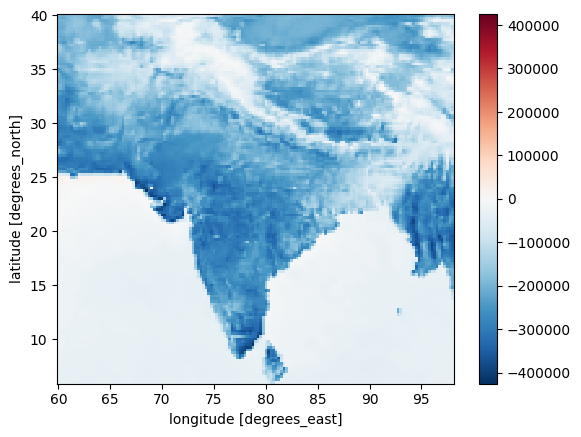

In [28]:
da_sshf_dlymean.mean('date').plot()

In [30]:
for year in range(1980,2023):
    file = [s for s in sshf_anom_files if str(year) in s][0]
    print(file)
    ds_sshf_anom = xr.open_dataset(dir_2D + file)
    print(list(ds_sshf_anom.data_vars))
    
    da_sshf_dlymean = \
    ds_sshf_anom['sshf_10D_anom'].groupby(ds_sshf_anom.date.dt.strftime("%d-%b")) + \
    ds_sshf_clmt['sshf_dly_clmt_10D_roll'].rename({"clmt_roll_strftime": "strftime"})
    
    print("writing")
    da_sshf_dlymean.to_netcdf(f'/home/data/lab_hardik/data/ERA5/daily_means/2D/SA_dly_means_prmnsn_surface_sensible_heat_flux_{year}.nc')
    ds_sshf_anom.close()
    

SA_dly_anoms_prmnsn_surface_sensible_heat_flux_1980.nc
['sshf_10D_anom']
writing
SA_dly_anoms_prmnsn_surface_sensible_heat_flux_1981.nc
['sshf_10D_anom']
writing
SA_dly_anoms_prmnsn_surface_sensible_heat_flux_1982.nc
['sshf_10D_anom']
writing
SA_dly_anoms_prmnsn_surface_sensible_heat_flux_1983.nc
['sshf_10D_anom']
writing
SA_dly_anoms_prmnsn_surface_sensible_heat_flux_1984.nc
['sshf_10D_anom']
writing
SA_dly_anoms_prmnsn_surface_sensible_heat_flux_1985.nc
['sshf_10D_anom']
writing
SA_dly_anoms_prmnsn_surface_sensible_heat_flux_1986.nc
['sshf_10D_anom']
writing
SA_dly_anoms_prmnsn_surface_sensible_heat_flux_1987.nc
['sshf_10D_anom']
writing
SA_dly_anoms_prmnsn_surface_sensible_heat_flux_1988.nc
['sshf_10D_anom']
writing
SA_dly_anoms_prmnsn_surface_sensible_heat_flux_1989.nc
['sshf_10D_anom']
writing
SA_dly_anoms_prmnsn_surface_sensible_heat_flux_1990.nc
['sshf_10D_anom']
writing
SA_dly_anoms_prmnsn_surface_sensible_heat_flux_1991.nc
['sshf_10D_anom']
writing
SA_dly_anoms_prmnsn_surface_

In [35]:
dir_proc_files = '/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/'
ds_clmt_M = xr.open_dataset(dir_proc_files + 'mass_per_level_clmtlgy_globe.nc')
M = ds_clmt_M['M']
M

<xarray.DataArray 'M' (latitude: 721, date: 122, isobaricInhPa: 23,
                       longitude: 1440)>
[2913301440 values with dtype=float64]
Coordinates:
  * latitude            (latitude) float64 -90.0 -89.75 -89.5 ... 89.75 90.0
  * isobaricInhPa       (isobaricInhPa) float64 100.0 125.0 ... 975.0 1e+03
  * longitude           (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
    clmt_roll_strftime  (date) object ...
    dates_roll_clmt     (date) datetime64[ns] ...
  * date                (date) datetime64[ns] 1900-03-01 ... 1900-06-30

In [40]:
da_sshf_dlymean.swap_dims({"date":"strftime"})

<xarray.DataArray (latitude: 137, longitude: 153, strftime: 121)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 40.0 39.75 39.5 39.25 ... 6.75 6.5 6.25 6.0
  * longitude  (longitude) float64 60.0 60.25 60.5 60.75 ... 97.5 97.75 98.0
    date       (strftime) datetime64[ns] 2022-03-01 2022-03-02 ... 2022-06-29
  * strftime   (strftime) object '01-Mar' '02-Mar' ... '28-Jun' '29-Jun'

In [46]:
a = xr.merge([
    da_sshf_dlymean.swap_dims({"date":"strftime"}).rename("sshf_dlymean"), 
    M.swap_dims({"date":"clmt_roll_strftime"}).rename({"clmt_roll_strftime":"strftime"}).drop("date")], 
    join="inner").swap_dims({"strftime":"date"})

In [50]:
import importlib

In [60]:
import sys
sys.path.insert(1, '/home/data/lab_hardik/udf/')
import variables

importlib.reload(variables)
from variables import *

$\mathregular{\mathcal{S}'_{x}}$
["$u'$", "$v'$", "$w'$", "$\\mathcal{S}'_x$", "$\\mathcal{S}'_y$", "$\\mathcal{S}'_z$", '${u̅}$', '${v̅}$', '${w̅}$', '$\\mathcal{S}̅_x$', '$\\mathcal{S}̅_y$', '$\\mathcal{S}̅_z$']
dict_values(["$u'$$\\mathcal{S}'_x$", "$v'$$\\mathcal{S}'_y$", "$w'$$\\mathcal{S}'_z$", "$u'$$\\mathcal{S}̅_x$", "$v'$$\\mathcal{S}̅_y$", "$w'$$\\mathcal{S}̅_z$", "${u̅}$$\\mathcal{S}'_x$", "${v̅}$$\\mathcal{S}'_y$", "${w̅}$$\\mathcal{S}'_z$", '${u̅}$$\\mathcal{S}̅_x$', '${v̅}$$\\mathcal{S}̅_y$', '${w̅}$$\\mathcal{S}̅_z$'])
["$v'$$\\mathcal{S}̅_y$", "$w'$$\\mathcal{S}̅_z$", "${u̅}$$\\mathcal{S}'_x$"]
["$u'$$\\mathcal{S}'_x$", "$v'$$\\mathcal{S}'_y$", "$w'$$\\mathcal{S}'_z$"]
['${u̅}$$\\mathcal{S}̅_x$', '${v̅}$$\\mathcal{S}̅_y$', '${w̅}$$\\mathcal{S}̅_z$']
["$u'$$\\mathcal{S}̅_x$", "${v̅}$$\\mathcal{S}'_y$", "${w̅}$$\\mathcal{S}'_z$"]


In [61]:
Axy = Axy_fn(a)

In [62]:
Axy

<xarray.DataArray 'latitude' (latitude: 137)>
array([5.92189371e+08, 5.94361511e+08, 5.96522336e+08, 5.98671804e+08,
       6.00809875e+08, 6.02936506e+08, 6.05051659e+08, 6.07155292e+08,
       6.09247366e+08, 6.11327841e+08, 6.13396677e+08, 6.15453835e+08,
       6.17499275e+08, 6.19532959e+08, 6.21554848e+08, 6.23564904e+08,
       6.25563088e+08, 6.27549362e+08, 6.29523688e+08, 6.31486029e+08,
       6.33436348e+08, 6.35374606e+08, 6.37300769e+08, 6.39214798e+08,
       6.41116657e+08, 6.43006310e+08, 6.44883721e+08, 6.46748855e+08,
       6.48601676e+08, 6.50442148e+08, 6.52270236e+08, 6.54085907e+08,
       6.55889124e+08, 6.57679854e+08, 6.59458063e+08, 6.61223717e+08,
       6.62976782e+08, 6.64717225e+08, 6.66445013e+08, 6.68160113e+08,
       6.69862491e+08, 6.71552117e+08, 6.73228957e+08, 6.74892980e+08,
       6.76544154e+08, 6.78182447e+08, 6.79807829e+08, 6.81420269e+08,
       6.83019735e+08, 6.84606197e+08, 6.86179625e+08, 6.87739990e+08,
       6.89287261e+08, 6.90821409e+08, 6.92342404e+08, 6.93850219e+08,
       6.95344823e+08, 6.96826190e+08, 6.98294289e+08, 6.99749094e+08,
       7.01190577e+08, 7.02618711e+08, 7.04033467e+08, 7.05434820e+08,
       7.06822742e+08, 7.08197207e+08, 7.09558189e+08, 7.10905662e+08,
       7.12239601e+08, 7.13559980e+08, 7.14866773e+08, 7.16159957e+08,
       7.17439505e+08, 7.18705395e+08, 7.19957602e+08, 7.21196101e+08,
       7.22420871e+08, 7.23631886e+08, 7.24829124e+08, 7.26012563e+08,
       7.27182179e+08, 7.28337951e+08, 7.29479857e+08, 7.30607874e+08,
       7.31721982e+08, 7.32822158e+08, 7.33908383e+08, 7.34980635e+08,
       7.36038894e+08, 7.37083140e+08, 7.38113353e+08, 7.39129514e+08,
       7.40131602e+08, 7.41119599e+08, 7.42093487e+08, 7.43053246e+08,
       7.43998859e+08, 7.44930307e+08, 7.45847572e+08, 7.46750638e+08,
       7.47639486e+08, 7.48514101e+08, 7.49374465e+08, 7.50220561e+08,
       7.51052375e+08, 7.51869890e+08, 7.52673090e+08, 7.53461961e+08,
       7.54236487e+08, 7.54996653e+08, 7.55742445e+08, 7.56473849e+08,
       7.57190850e+08, 7.57893436e+08, 7.58581593e+08, 7.59255307e+08,
       7.59914566e+08, 7.60559358e+08, 7.61189669e+08, 7.61805489e+08,
       7.62406805e+08, 7.62993606e+08, 7.63565880e+08, 7.64123617e+08,
       7.64666807e+08, 7.65195438e+08, 7.65709501e+08, 7.66208987e+08,
       7.66693884e+08, 7.67164185e+08, 7.67619880e+08, 7.68060961e+08,
       7.68487419e+08, 7.68899246e+08, 7.69296434e+08, 7.69678977e+08,
       7.70046865e+08])
Coordinates:
  * latitude  (latitude) float64 40.0 39.75 39.5 39.25 ... 6.75 6.5 6.25 6.0

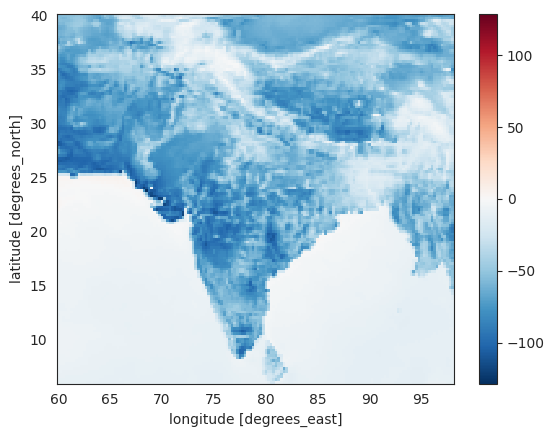

In [63]:
(Axy*a['sshf_dlymean']/a['M'].sel(isobaricInhPa = slice(600,900)).sum('isobaricInhPa')).mean('date').plot()
# .sel(date = da_sshf_dlymean.date.dt.month == 4).mean('date').plot()

# data prep

In [4]:
dir_base = '/home/scratch/HS_Surface/'
print(sorted(os.listdir(dir_base))[:5])


['HS_Surface_1986_qc.py', 'dwld.py', 'era5_10m_u_component_of_wind_2005_5_16.grib', 'era5_10m_u_component_of_wind_2016_1_31.grib', 'era5_10m_v_component_of_wind_1980_10_1.grib']


In [5]:
# var = 'boundary_layer_height'
# dir_var = dir_base + var + '/'
# print(dir_var)
# hw_files = [''.join(['_'.join(['era5', var, str(df_hwoi_dts[i].year), str(df_hwoi_dts[i].month), 
#           str(df_hwoi_dts[i].day)]), '.grib']) for i in range(len(df_hwoi_dts))]

# # print(hw_files)
# [(dir_var + s) if os.path.exists(dir_var + s) else ('/home/scratch/HS_Surface/' + s) if\
#  os.path.exists('/home/scratch/HS_Surface/' + s) else np.nan for s in hw_files][:4]



In [6]:
ds_tst = xr.open_dataset('/home/scratch/HS_Surface/era5_mean_surface_downward_long_wave_radiation_flux_2006_3_10.grib', 
               backend_kwargs={'indexpath':""})
ds_tst['msdwlwrf'][0, 10:20, 10].data
ds_restckd = ds_tst.stack(ts = ['time','step']).swap_dims({'ts':'valid_time'})['msdwlwrf'][100,200,:].shift(valid_time=-1)
# ds_restckd.where(ds_restckd==ds_restckd, drop=True)

# .sel(valid_time = ds_restckd.valid_time.dt.day == ds_restckd.valid_time[5].dt.day)

# \
# .to_dataframe()


/home/lab_hardik/my_conda/lib/python3.9/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [7]:
ds_tst.close()

## Surface files treatment and preparation for analysis

In [8]:
os.getcwd()

'/home/data/lab_hardik/data/ERA5/daily_means/2D'

In [19]:
dir_clmtlgy = '/home/data/lab_hardik/data/ERA5/climatology/'
dir_surf = '/home/scratch/HS_Surface/'
dir_ulev_alt = '/home/scratch/datadownload_D/'

surf_vars_instntns = \
[
    '2m_dewpoint_temperature', '2m_temperature','boundary_layer_height', 
    '10m_u_component_of_wind','10m_v_component_of_wind',
    'geopotential','surface_pressure','mean_sea_level_pressure',
    'convective_available_potential_energy','convective_inhibition',
    'total_column_water_vapour', 'total_column_rain_water'
]

surf_vars_accmltn = \
[
    'mean_surface_downward_short_wave_radiation_flux',
    'mean_surface_downward_long_wave_radiation_flux',
    'mean_surface_net_long_wave_radiation_flux',
    'mean_surface_net_short_wave_radiation_flux',
    'surface_sensible_heat_flux', 
    'surface_latent_heat_flux',
    'top_net_thermal_radiation', 
    'top_net_solar_radiation'
]

surf_vars = [
#     '2m_dewpoint_temperature', 
#     'convective_available_potential_energy',
    'boundary_layer_height', 
#     'surface_pressure',
    'surface_sensible_heat_flux', 
    'surface_latent_heat_flux',
#     'volumetric_soil_water_layer_1'
#     'mean_surface_net_short_wave_radiation_flux', 
#     'mean_surface_net_long_wave_radiation_flux',
#     'mean_surface_downward_short_wave_radiation_flux',
#     'mean_surface_downward_long_wave_radiation_flux',
#     '2m_temperature',
#     '10m_u_component_of_wind', '10m_v_component_of_wind', 
#     'mean_sea_level_pressure', 
#     'top_net_thermal_radiation', 'top_net_solar_radiation',
    
]


In [10]:
import zarr
import s3fs
# AWS S3 path
minio_path = 'http://192.168.1.237:9000/' 
# Initilize the S3 file system
mn =s3fs.S3FileSystem(key='d0d250b2541ac33f4660',
                      secret='2fb32d964768bc94a3c0',
                     client_kwargs={'endpoint_url': minio_path})
bucket = 'era5'
print(mn.ls(bucket))
store = s3fs.S3Map(root=bucket, s3=mn, check=False)
mn.ls('era5/era5/surface')

['era5/.zgroup', 'era5/.zmetadata', 'era5/era5']


['era5/era5/surface/.zgroup',
 'era5/era5/surface/10m_u_component_of_wind',
 'era5/era5/surface/10m_v_component_of_wind',
 'era5/era5/surface/2m_dewpoint_temperature',
 'era5/era5/surface/2m_temperature',
 'era5/era5/surface/geopotential']

In [11]:
dir_2d = '/home/scratch/HS_Surface/'

In [12]:
dir_clmt_2d = '/home/data/lab_hardik/data/ERA5/climatology/2D/'
clmt_files = [s for s in os.listdir(dir_clmt_2d) if ('.nc' in s) and s.startswith('SA')]
#              and '2m_temp' not in s]
clmt_files.sort()
print(len(clmt_files))
clmt_files

10


['SA_rolling_clmtlgy_10m_v_component_of_wind_1980_2022.nc',
 'SA_rolling_clmtlgy_2m_temperature_1980_2022.nc',
 'SA_rolling_clmtlgy_boundary_layer_height_1980_2022.nc',
 'SA_rolling_clmtlgy_prmnsn_mean_surface_downward_long_wave_radiation_flux_1980_2022.nc',
 'SA_rolling_clmtlgy_prmnsn_mean_surface_downward_short_wave_radiation_flux_1980_2022.nc',
 'SA_rolling_clmtlgy_prmnsn_mean_surface_net_long_wave_radiation_flux_1980_2022.nc',
 'SA_rolling_clmtlgy_prmnsn_mean_surface_net_short_wave_radiation_flux_1980_2022.nc',
 'SA_rolling_clmtlgy_prmnsn_surface_pressure_1980_2022.nc',
 'SA_rolling_clmtlgy_surface_latent_heat_flux_1980_2022.nc',
 'SA_rolling_clmtlgy_surface_sensible_heat_flux_1980_2022.nc']

In [13]:
dir_out = '/home/data/lab_hardik/data/ERA5/daily_means/2D/'

In [20]:
surf_vars

['boundary_layer_height',
 'surface_sensible_heat_flux',
 'surface_latent_heat_flux']

In [21]:
dir_out

'/home/data/lab_hardik/data/ERA5/daily_means/2D/'

In [18]:
# list(globals()[f"ds_{var}"].data_vars)[0]

In [29]:
# var = 'mean_surface_downward_short_wave_radiation_flux'
def preprocess_modify_forecast_files(ds): 
    dname = list(ds.data_vars)[0]
    da_time_remap = ds[dname].stack(ts = ['time','step']).swap_dims({'ts':'valid_time'}).shift(valid_time=-1)\
    .drop_vars(['number','surface','ts']).compute()
    ds_na_fltrd = da_time_remap.where(da_time_remap==da_time_remap, drop=True).to_dataset() 
    print(ds_na_fltrd.valid_time.max().data)
    return ds_na_fltrd

def preprocess_datelev(ds):
    dname = list(ds.data_vars)[0]
    ds = ds[dname].groupby('time.date').mean().to_dataset()
    ds['date'] = ds['date'].astype('datetime64[D]')
    return ds

for var in ['surface_latent_heat_flux']:
    for year in [s for s in range(1994, 1995)]: #  if s != 2016 (since 2016 was done first)

#         if (year==2010) and (var=='boundary_layer_height'):
#             print(year,var,'continue')
#             continue
        import gc
        gc.collect()
        gc.collect()

        file_out = 'SA_dly_anoms_prmnsn_{}_{}.nc'.format(var,year) if 'soil' not in var \
        else 'swvl1_daily_vals_prmnsn_{}_{}.nc'.format(var, year)

        print(file_out)

        if file_out in os.listdir(dir_out):
            print(file_out, 'exists in {}'.format(dir_out))
            continue
        
        if var=='2m_dewpoint_temperature':
            globals()[f"ds_{var}"] = \
            xr.open_zarr(store=store, 
                         group='era5/surface/2m_dewpoint_temperature', 
                         consolidated=True)
            
            globals()[f"ds_{var}"] = \
            globals()[f"ds_{var}"].sel(
                time = (globals()[f"ds_{var}"].time.dt.year==year) & 
                (globals()[f"ds_{var}"].time.dt.month.isin([3,4,5,6]))
            )

            globals()[f"ds_{var}"] = preprocess_datelev(globals()[f"ds_{var}"])
            gc.collect()

        
        if var +'.nc' in os.listdir(dir_out):
            ds_tst = xr.open_dataset(dir_out + var + '.nc')
            if pd.to_datetime(ds_tst.date.min().data) == dt(1995,3,1):
                ds_tst.close()
                print('next_var')
                continue

        os.chdir(dir_2d)
        var_files = os.listdir()
        files = [s for s in os.listdir(dir_2d) if (var in s) and s.endswith('.grib')]
        files = [s for s in files if (int(s.split('_')[-3])==year) and (int(s.split('_')[-2]) in [3,4,5,6])]

        ## read in files w/ preprocessed aggregaton to date level        
        if len(files)>0:
            globals()[f"ds_{var}"] = xr.open_mfdataset(
                files, parallel=True, 
    #                          engine='cfgrib',
                coords='minimal', compat='override',
                preprocess = preprocess_modify_forecast_files if \
                any([s for s in surf_vars_accmltn if s in var]) else preprocess_datelev,
                data_vars = 'minimal',
                combine_attrs = 'override',
                backend_kwargs={'indexpath':''}
            )

            dvar = list(globals()[f"ds_{var}"].data_vars)[0]

            if var in surf_vars_accmltn:
                globals()[f"ds_{var}"] = \
                globals()[f"ds_{var}"][dvar].groupby('valid_time.date').mean().to_dataset()
                
                globals()[f"ds_{var}"]['date'] = globals()[f"ds_{var}"]['date'].astype('datetime64[ns]')
                
                globals()[f"ds_{var}"] = \
                globals()[f"ds_{var}"].sel(date = globals()[f"ds_{var}"].date.dt.month.isin([3,4,5,6]))\
                .isel(date=slice(0,-1))
                
                print(globals()[f"ds_{var}"].date.max().data)
                
                gc.collect()


            print(var)

        if 'soil' not in var:
            # join clmt, compute 10D rolling anomalies
            clmt_file = [s for s in clmt_files if var in s][0]
            ds_clmt = xr.open_dataset(dir_clmt_2d+clmt_file)
            dly_anoms_sa = \
            (
                globals()[f"ds_{var}"][dvar]\
                .groupby(globals()[f"ds_{var}"].date.dt.strftime('%d-%b')) - \
                ds_clmt['{}_dly_clmt_10D_roll'.format(dvar)].rename({'clmt_roll_strftime':'strftime'})
            )
            gc.collect()
            if dly_anoms_sa.latitude[0] >  dly_anoms_sa.latitude[1]:                
                    
                dly_anoms_sa = \
                dly_anoms_sa.sel(latitude = slice(sa_lat[1], sa_lat[0]), longitude = slice(sa_lon[0], sa_lon[1]))

            else: 
                dly_anoms_sa = \
                dly_anoms_sa.sel(latitude = slice(sa_lat[0], sa_lat[1]), longitude = slice(sa_lon[0], sa_lon[1]))

            dly_anoms_sa = dly_anoms_sa.rename('{}_10D_anom'.format(dvar))

            dly_anoms_sa.to_netcdf(dir_out + file_out)
            print(file_out,'written')

        else: 
            globals()[f"ds_{var}"][dvar].to_netcdf(dir_out + file_out)
            print(file_out, 'written')
        
    del file_out 
    gc.collect()


SA_dly_anoms_prmnsn_surface_latent_heat_flux_1994.nc
1994-06-29T22:00:00.000000000
1994-06-11T22:00:00.000000000
1994-06-22T22:00:00.000000000
1994-06-25T22:00:00.000000000
1994-05-21T22:00:00.000000000
1994-06-07T22:00:00.000000000
1994-04-23T22:00:00.000000000
1994-05-23T22:00:00.000000000
1994-05-26T22:00:00.000000000
1994-04-15T22:00:00.000000000
1994-06-17T22:00:00.000000000
1994-04-19T22:00:00.000000000
1994-05-30T22:00:00.000000000
1994-05-25T22:00:00.000000000
1994-06-19T22:00:00.000000000
1994-05-06T22:00:00.000000000
1994-03-25T22:00:00.000000000
1994-05-01T22:00:00.000000000
1994-03-14T22:00:00.000000000
1994-06-18T22:00:00.000000000
1994-04-29T22:00:00.000000000
1994-03-12T22:00:00.000000000
1994-03-21T22:00:00.000000000
1994-03-08T22:00:00.000000000
1994-04-09T22:00:00.000000000
1994-06-04T22:00:00.000000000
1994-03-28T22:00:00.000000000
1994-05-02T22:00:00.000000000
1994-06-02T22:00:00.000000000
1994-05-04T22:00:00.000000000
1994-05-17T22:00:00.000000000
1994-03-31T22:00:

/home/lab_hardik/my_conda/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


1994-06-29T00:00:00.000000000
surface_latent_heat_flux
SA_dly_anoms_prmnsn_surface_latent_heat_flux_1994.nc written


In [31]:
import gc
gc.collect()

0

In [1]:
1

1

In [2]:
# dly_anoms_sa.to_netcdf(dir_out + 'SA_dly_anoms_prmnsn_{}_{}.nc'.format(var,year))
# 'SA_dly_anoms_prmnsn_{}_{}.nc'.format(var,year)

In [23]:
clmt_files

# = dly_anoms_sa.rename('{}_10D_anom'.format(dvar))

['SA_rolling_clmtlgy_10m_v_component_of_wind_1980_2022.nc',
 'SA_rolling_clmtlgy_2m_temperature_1980_2022.nc',
 'SA_rolling_clmtlgy_boundary_layer_height_1980_2022.nc',
 'SA_rolling_clmtlgy_prmnsn_mean_surface_downward_long_wave_radiation_flux_1980_2022.nc',
 'SA_rolling_clmtlgy_prmnsn_mean_surface_downward_short_wave_radiation_flux_1980_2022.nc',
 'SA_rolling_clmtlgy_prmnsn_mean_surface_net_long_wave_radiation_flux_1980_2022.nc',
 'SA_rolling_clmtlgy_prmnsn_mean_surface_net_short_wave_radiation_flux_1980_2022.nc',
 'SA_rolling_clmtlgy_prmnsn_surface_pressure_1980_2022.nc',
 'SA_rolling_clmtlgy_surface_latent_heat_flux_1980_2022.nc',
 'SA_rolling_clmtlgy_surface_sensible_heat_flux_1980_2022.nc']

In [31]:
# dly_anoms_sa = 
(
        globals()[f"ds_{var}"][dvar]\
        .groupby(globals()[f"ds_{var}"].date.dt.strftime('%d-%b')) - \
        ds_clmt['{}_dly_clmt_10D_roll'.format(dvar)].rename({'clmt_roll_strftime':'strftime'})
    )
# .sel(latitude = slice(sa_lat[1], sa_lat[0]), longitude = slice(sa_lon[0], sa_lon[1]))
# \
# .mean(['latitude', 'longitude'])

# dly_anoms_sa.to_netcdf('NI_avg_dly_anoms_prmnsn_{}.nc'.format(year))

<xarray.DataArray (latitude: 137, longitude: 153, date: 121)>
dask.array<sub, shape=(137, 153, 121), dtype=float32, chunksize=(137, 153, 1), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 40.0 39.75 39.5 39.25 ... 6.75 6.5 6.25 6.0
  * longitude  (longitude) float64 60.0 60.25 60.5 60.75 ... 97.5 97.75 98.0
  * date       (date) datetime64[ns] 2016-03-01 2016-03-02 ... 2016-06-29
    strftime   (date) object '01-Mar' '02-Mar' '03-Mar' ... '28-Jun' '29-Jun'

In [33]:
[s for s in dir() if s.startswith('ds')]

['ds_clmt',
 'ds_mean_surface_downward_long_wave_radiation_flux',
 'ds_restckd',
 'ds_tst']

In [34]:
print(ds_mean_surface_downward_long_wave_radiation_flux.msdwlwrf.sel(latitude=25, longitude=75).values)

[339.3447  364.60107 355.1555  352.85217 344.44336 339.4916  344.95715
 341.2588  357.66678 363.64783 354.4075  344.73087 343.8175  329.60593
 343.71713 335.4547  377.08615 366.33716 347.1157  337.10425 344.5732
 314.62915 324.56497 339.63065 378.94003 380.40475 361.4526  348.46567
 342.3944  361.2045  360.90396 378.68124 402.78726 384.46823 369.71524
 367.57584 378.106   363.5466  351.7297  361.6399  374.7936  364.68613
 356.05078 354.9456  370.49625 375.6416  375.82053 380.9268  354.1243
 378.88696 365.4166  367.73782 365.65866 349.76648 374.77222 380.58725
 378.7296  361.59497 363.77063 363.44113 371.01132 384.88232 391.94638
 380.47375 380.89395 382.6746  389.91623 396.78696 399.6932  406.14798
 408.71533 410.18518 396.00497 387.90787 411.2816  409.60706 412.75317
 399.92688 413.3274  413.96567 408.3447  413.82303 413.30188 417.5032
 409.8898  410.1196  415.49753 421.2758  412.36728 417.2999  412.11472
 416.2133  421.1593  426.07654 427.1215  410.64627 387.50867 389.90543
 404.1864

In [98]:
'/home/data/lab_hardik/HW/HW_ERA5/hw_2016/{}.nc'.format(var.replace('ds_',''))

'/home/data/lab_hardik/HW/HW_ERA5/hw_2016/surface_sensible_heat_flux.nc'

In [110]:
# for var in [s for s in dir() if s.startswith('ds_')]:
# for var in [s for s in dir() if any(t in s for t in ['convective_available_potential_energy', 'boundary_layer_height','mean_sea_level_pressure'])]:
#     if os.path.exists('/home/data/lab_hardik/HW/HW_ERA5/hw_2016/{}.nc'.format(var.replace('ds_',''))):
#         continue
for var in [s for s in dir() if s.startswith('ds_')][1]:
    print(var)
    with globals()[f"{var}"] as ds:
        out_str = '/home/data/lab_hardik/HW/HW_ERA5/analysis/hw_2016/2D/{}.nc'\
                                                       .format(var.replace('ds_',''))

        ds['date'] = ds.date.astype('datetime64[ns]')
        ds.sel(date = ds.date.dt.year==2016).to_netcdf(out_str, mode='w')
        print(var.replace('ds_',''))
        
#         ds.sel(date = ds.date.dt.year==2006).to_netcdf('/home/data/lab_hardik/HW/HW_ERA5/analysis/hw_2006/2D/{}.nc'\
#                                                        .format(var.replace('ds_','')), mode='w')
        

ds_convective_available_potential_energy
convective_available_potential_energy
ds_mean_surface_downward_long_wave_radiation_flux
mean_surface_downward_long_wave_radiation_flux
ds_mean_surface_downward_short_wave_radiation_flux
mean_surface_downward_short_wave_radiation_flux
ds_mean_surface_net_long_wave_radiation_flux
mean_surface_net_long_wave_radiation_flux
ds_mean_surface_net_short_wave_radiation_flux
mean_surface_net_short_wave_radiation_flux
ds_old
old
ds_surface_latent_heat_flux
surface_latent_heat_flux
ds_surface_pressure
surface_pressure
ds_surface_sensible_heat_flux
surface_sensible_heat_flux


# Appendix

# POC for rolling mean

In [ ]:
# ds = ds_surface_sensible_heat_flux
# dname = list(ds.data_vars)[0]
# ds['30D_clmt_left'] = ds[dname].rolling(date=30, center=False).mean()
# ds = ds.merge(df_hwoi.to_xarray(), join='left')
# # ds['20D_clmt'][0].plot() # all nas as expected
# ds['30D_clmt_left'][20].plot() # all good



# POC 40Y clmt mapping

In [ ]:
# # var.replace("ds_", "")
# var = [s for s in dir() if s.startswith('ds_')][2]
# clmt = xr.open_dataset("/home/data/lab_hardik/climatology/dly_clmtlgy_" + var.replace("ds_", "") + "_1980_2022.nc")
# dname = 'd2m'
# clmt = clmt.rename({dname: '40Y_clmt'})
# ds_2m_dewpoint_temperature['40Y_clmt_anom'] = ds_2m_dewpoint_temperature['d2m'].assign_coords({'strftime': ('date', ds_2m_dewpoint_temperature.date.dt.strftime('%d-%b').data)})\
# .groupby('strftime') - clmt['40Y_clmt']

In [ ]:
# clmt_16_may = clmt['40Y_clmt'].loc[dict(strftime = '16-May')]
# clmt_16_may.loc[dict(latitude = 70, longitude = 30)].values


In [ ]:
# ds_2m_dewpoint_temperature['d2m'][0].loc[dict(latitude = 70, longitude = 30)].values

In [ ]:
# # create period coordinate da in main ds
# # ds_merged = ds_2m_dewpoint_temperature.assign_coords({'strftime': ('date', ds_2m_dewpoint_temperature.date.dt.strftime('%d-%b').data)}).merge(clmt, join='inner')
# exp = ds_2m_dewpoint_temperature['d2m'].assign_coords({'strftime': ('date', ds_2m_dewpoint_temperature.date.dt.strftime('%d-%b').data)}).groupby('strftime') - clmt['40Y_clmt']
# exp[0].loc[dict(latitude = 70, longitude = 30)].values

In [ ]:
# 3D climatology example
da = xr.DataArray(
    np.linspace(0, 11, num=12),
    coords=[
        pd.date_range(
            "1999-12-15",
            periods=12,
            freq=pd.DateOffset(months=1),
        )
    ],
    dims="time",
)
print(da.rolling(time=3, center=True).mean())
print(da.rolling(time=3, center=False).mean())

In [ ]:
# this was to understand the structure of the msdwswrf file
# so as to CHANGE it

# fig = plt.figure()
# ax1 = fig.add_subplot(321)
# ds_mean_surface_downward_short_wave_radiation_flux['msdwswrf'][0,:,0,0].fillna(0).plot(ax=ax1)
# ax1.title.set_fontsize(6)

# ax2 = fig.add_subplot(322)
# ds_mean_surface_downward_short_wave_radiation_flux['msdwswrf'][1,:,0,0].fillna(0).plot(ax=ax2)
# ax2.title.set_fontsize(6)

# ax3 = fig.add_subplot(323)
# ds_mean_surface_downward_short_wave_radiation_flux['msdwswrf'][2,:,0,0].fillna(0).plot(ax=ax3)
# ax3.title.set_fontsize(6)

# ax4 = fig.add_subplot(324)
# ds_mean_surface_downward_short_wave_radiation_flux['msdwswrf'][3,:,0,0].fillna(0).plot(ax=ax4)
# ax4.title.set_fontsize(6)

# ax5 = fig.add_subplot(325)
# (ds_mean_surface_downward_short_wave_radiation_flux['msdwswrf'][2,:,0,0].fillna(0) + \
# ds_mean_surface_downward_short_wave_radiation_flux['msdwswrf'][3,:,0,0].fillna(0)).plot(ax=ax5)
# ax4.title.set_fontsize(6)
# ax4.yaxis.label.set_size(6)


### notes from the grave

In [42]:
#     dname = list(ds.data_vars)[0]
#     da = ds[dname].stack(timestep = ['time','step']).isel(timestep = slice(5,29)) 
#     time_new = [datetime.strptime(str(ds[dname]['time.date'][1].values), '%Y-%m-%d') +\
#                 timedelta(hours=i) for i in range(24)]
#     da = da.assign_coords(time_new = ('timestep', time_new))
#     da = da.swap_dims({'timestep':'time_new'}).drop(['time', 'step', 'number', 'surface'])
#     ds = da.groupby('time_new.date').mean().to_dataset()
#     ds['date'] = ds['date'].astype('datetime64[D]')
#     return ds
